In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os , shutil
original_dataset_dir = 'dogs-vs-cats/train'

In [3]:
base_dir="dogs-vs-cats-small"
os.mkdir(base_dir)
train_dir =os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

In [5]:
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [6]:
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

In [7]:
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [8]:
test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)

In [9]:
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [10]:
fnames=['cat.{}.jpg'.format(i)  for i in range(1000)]

for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src, dst)
    

In [11]:
fnames=['cat.{}.jpg'.format(i)  for i in range(1000,1500)]

for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src, dst)


In [12]:
fnames=['cat.{}.jpg'.format(i)  for i in range(1500,2000)]

for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src, dst)


In [13]:
fnames=['dog.{}.jpg'.format(i)  for i in range(1000)]

for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src, dst)

In [15]:
fnames=['dog.{}.jpg'.format(i)  for i in range(1000,1500)]

for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src, dst)
    

In [16]:
fnames=['dog.{}.jpg'.format(i)  for i in range(1500,2000)]

for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src, dst)
    

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [19]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics =['acc'])


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [21]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.


In [22]:
validation_generator=test_datagen.flow_from_directory(
validation_dir,target_size=(150,150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [23]:
history=model.fit_generator(
train_generator,
steps_per_epoch=10,
epochs=10,
validation_data=validation_generator,
validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 50 steps
Epoch 1/10
10/10 [==============================] - 23s 2s/step - loss: 0.7020 - acc: 0.5150 - val_loss: 0.6908 - val_acc: 0.5000
Epoch 2/10
10/10 [==============================] - 15s 1s/step - loss: 0.6933 - acc: 0.5050 - val_loss: 0.6889 - val_acc: 0.5000
Epoch 3/10
10/10 [==============================] - 15s 1s/step - loss: 0.6981 - acc: 0.4800 - val_loss: 0.6899 - val_acc: 0.5700
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 0.6843 - acc: 0.5600 - val_loss: 0.6866 - val_acc: 0.5000
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.6797 - acc: 0.5600 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 6/10
10/10 [==============================] - 15s 2s/step - loss: 0.6921 - acc: 0.5200 - val_loss: 0.6825 - val_acc: 0.5030
Epoch 7/10
10/10 [==============================] - 

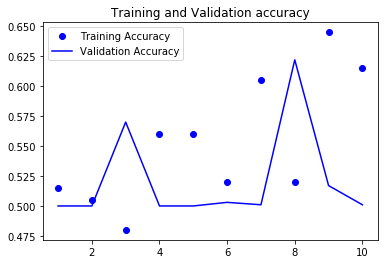

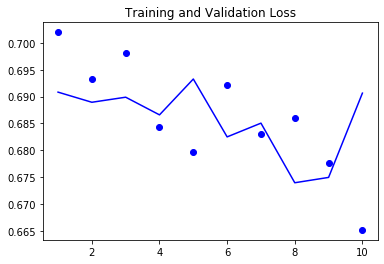

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend
plt.show()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1